In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd drive/'My Drive'/'Colab Notebooks'/L14/coconut_detection_yolo3

/content/drive/My Drive/Colab Notebooks/L14/coconut_detection_yolo3


# Kmean clustering to find 9 anchor boxes, 3 for each image resolutions

In [0]:
!python kmeans.py

./datasets/images/1.png 720 1280 0.5777777777777777 0.325
./datasets/images/10.png 720 1280 0.5777777777777777 0.325
./datasets/images/100.png 720 1280 0.5777777777777777 0.325
./datasets/images/101.png 720 1280 0.5777777777777777 0.325
./datasets/images/102.png 720 1280 0.5777777777777777 0.325
./datasets/images/103.png 720 1280 0.5777777777777777 0.325
./datasets/images/104.png 720 1280 0.5777777777777777 0.325
./datasets/images/105.png 720 1280 0.5777777777777777 0.325
./datasets/images/106.png 720 1280 0.5777777777777777 0.325
./datasets/images/107.png 720 1280 0.5777777777777777 0.325
./datasets/images/108.png 720 1280 0.5777777777777777 0.325
./datasets/images/109.png 720 1280 0.5777777777777777 0.325
./datasets/images/11.png 720 1280 0.5777777777777777 0.325
./datasets/images/110.png 720 1280 0.5777777777777777 0.325
./datasets/images/111.png 720 1280 0.5777777777777777 0.325
./datasets/images/112.png 720 1280 0.5777777777777777 0.325
./datasets/images/113.png 720 1280 0.5777777

# Training YOLO model

In [0]:
!python train.py

Using TensorFlow backend.
W0707 13:08:51.464562 139637689157504 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0707 13:08:51.465054 139637689157504 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0707 13:08:51.508952 139637689157504 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0707 13:08:51.509181 139637689157504 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.

In [0]:
from yolo import YOLO
from PIL import Image
import os
from matplotlib import pyplot as plt
import numpy as np
import cv2

# Load model and get detection results

Using confident threshold=0.1 instead of 0.3 to get predict with higher accuracy

In [0]:
yolo=YOLO(model_path=os.path.join('logs','07072019','trained_weights_final.h5'))

W0707 14:23:09.913612 139900550838144 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0707 14:23:09.915114 139900550838144 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0707 14:23:09.916759 139900550838144 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:186: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0707 14:23:10.126470 139900550838144 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:190: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.

W0707 14:23:10.151786 139900550838144 

logs/07072019/trained_weights_final.h5 model, anchors, and classes loaded.


W0707 14:23:38.929001 139900550838144 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/array_ops.py:1354: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
for img_name in os.listdir(os.path.join('datasets','images')):
  print(img_name)
  image=Image.open(os.path.join('datasets','images',img_name))
  r_image, _ = yolo.detect_image(image)
  r_image.save(os.path.join('results',img_name))
  print('----------------------------------------------')

336.png
(416, 416, 3)
Found 7 boxes for img
coconut 0.18 (292, 1) (459, 27)
coconut 0.30 (295, 38) (452, 242)
coconut 0.34 (523, 333) (655, 524)
coconut 0.40 (71, 13) (317, 153)
coconut 0.58 (535, 508) (703, 747)
coconut 0.81 (377, 706) (611, 946)
coconut 0.94 (438, 0) (589, 130)
3.4303106789993763
----------------------------------------------
58.png
(416, 416, 3)
Found 10 boxes for img
coconut 0.26 (121, 72) (311, 233)
coconut 0.27 (247, 10) (395, 100)
coconut 0.43 (109, 612) (279, 783)
coconut 0.44 (71, 1118) (377, 1267)
coconut 0.54 (9, 0) (248, 86)
coconut 0.56 (278, 355) (412, 563)
coconut 0.66 (411, 152) (583, 314)
coconut 0.77 (406, 289) (642, 572)
coconut 0.79 (5, 734) (193, 1058)
coconut 0.82 (488, 666) (691, 983)
0.16813861199989333
----------------------------------------------
3.png
(416, 416, 3)
Found 3 boxes for img
coconut 0.28 (406, 165) (538, 336)
coconut 0.58 (370, 93) (513, 182)
coconut 0.90 (200, 0) (340, 91)
0.15150062700013223
------------------------------------

# Visualize results

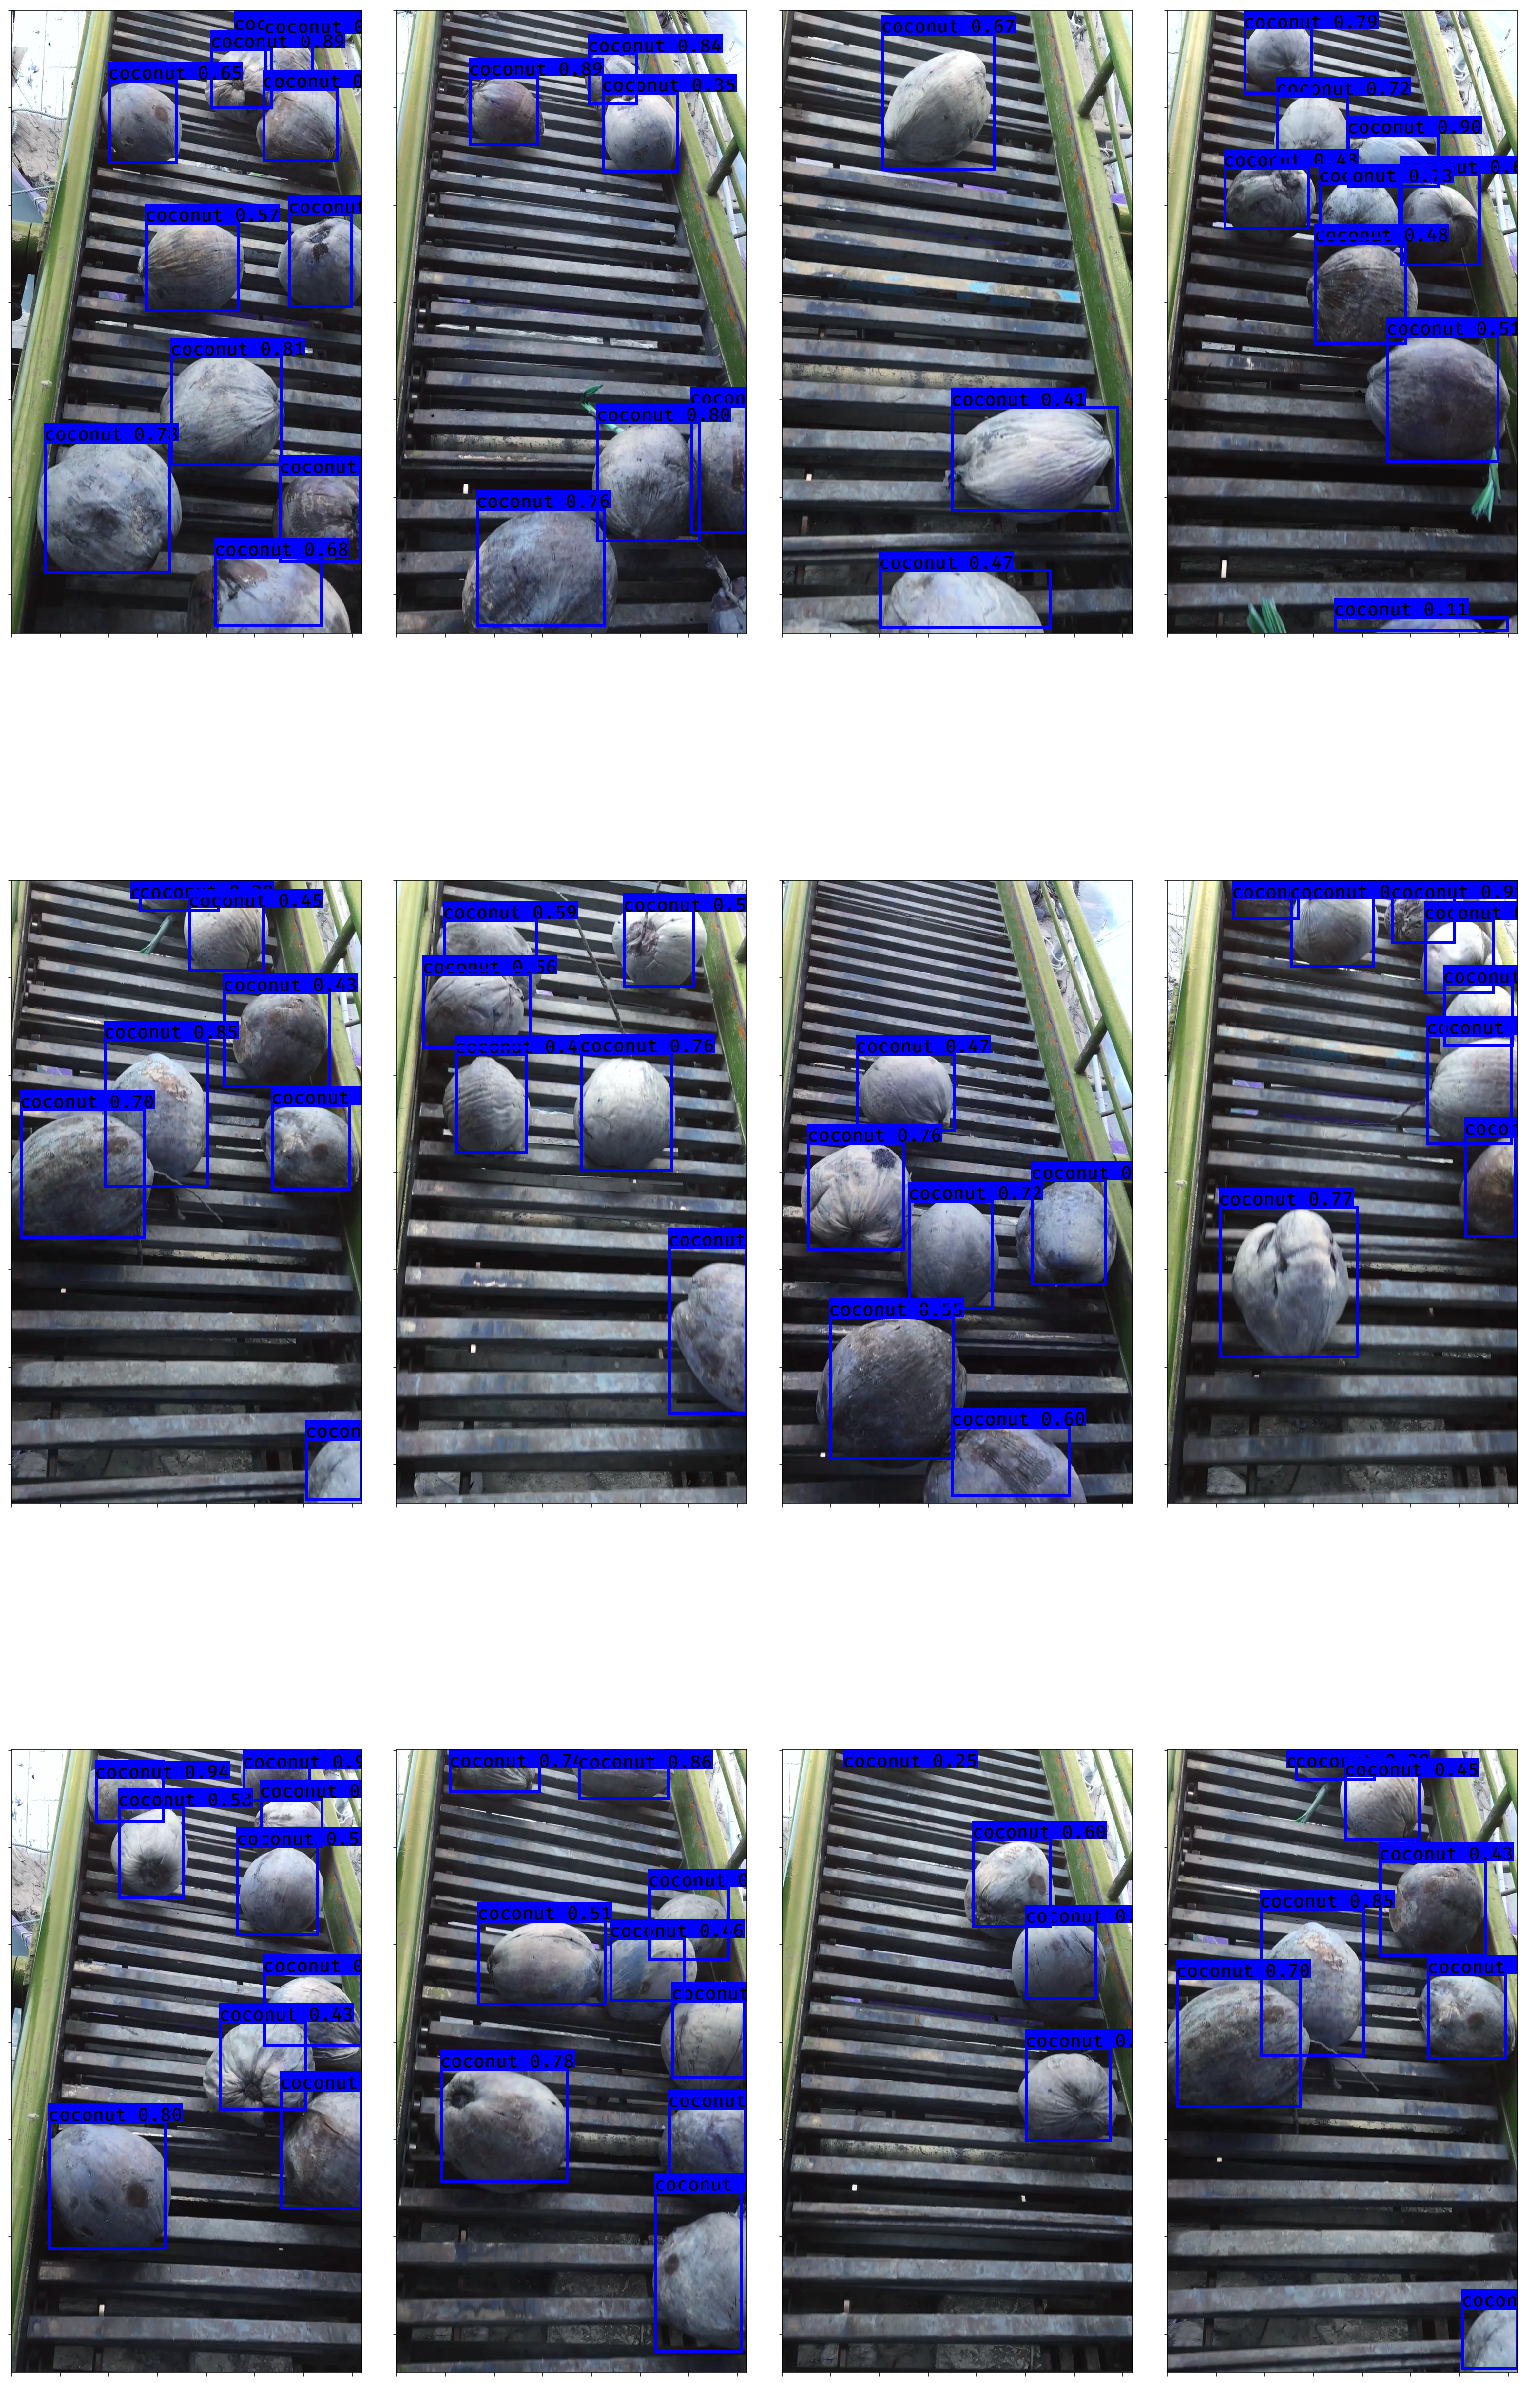

In [0]:
results=os.listdir('results')
fig = plt.figure(figsize=(27,48)) # Notice the equal aspect ratio
ax = [fig.add_subplot(3,4,i+1) for i in range(12)]

for a in ax:
    rand_name=np.random.choice(results)
    a.imshow(cv2.imread(os.path.join('results',rand_name)),aspect='equal')
    a.set_xticklabels([])
    a.set_yticklabels([])

fig.subplots_adjust(wspace=0.1, hspace=0)